In [100]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import gensim
from pathlib import Path
from gensim.models import Word2Vec

In [81]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\users\admin\appdata\local\continuum\anaconda3\lib\site-packages (3.8.1)
Note: you may need to restart the kernel to use updated packages.


In [12]:
train_data = pd.read_csv("movietrain.tsv/train.tsv", sep="\t")

In [14]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [15]:
train_data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [22]:
train_data.groupby('SentenceId')['PhraseId'].count()

SentenceId
1       63
2       18
3       35
4       40
5       10
        ..
8540    13
8541    24
8542    10
8543     8
8544    21
Name: PhraseId, Length: 8529, dtype: int64

In [25]:
train_data.nunique()

PhraseId      156060
SentenceId      8529
Phrase        156060
Sentiment          5
dtype: int64

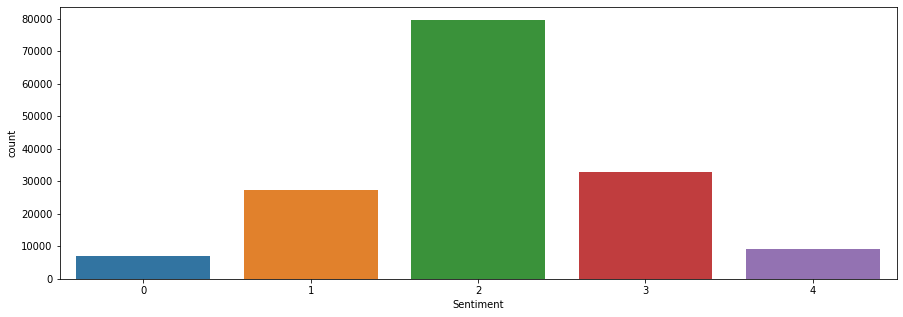

2    50.994489
3    21.098936
1    17.475971
4     5.899013
0     4.531590
Name: Sentiment, dtype: float64

In [69]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data=train_data, x='Sentiment')
plt.show()
c =(train_data['Sentiment'].value_counts()/train_data.shape[0]*100)
c

In [34]:
train_data.loc[train_data.SentenceId ==2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


In [35]:
train_data.loc[train_data.SentenceId ==3]

,PhraseId,SentenceId,Phrase,Sentiment
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
82,83,3,Even fans of Ismail Merchant 's work,2
83,84,3,Even fans,2
84,85,3,Even,2
85,86,3,fans,3
86,87,3,of Ismail Merchant 's work,2
87,88,3,Ismail Merchant 's work,2
88,89,3,Ismail Merchant 's,2
89,90,3,Ismail,2
90,91,3,Merchant 's,2


In [36]:
train_data.loc[train_data.SentenceId ==4]

,PhraseId,SentenceId,Phrase,Sentiment
116,117,4,A positively thrilling combination of ethnogra...,3
117,118,4,A positively thrilling combination of ethnogra...,4
118,119,4,A positively thrilling combination of ethnogra...,4
119,120,4,A positively thrilling combination,3
120,121,4,positively thrilling combination,3
121,122,4,positively,3
122,123,4,thrilling combination,3
123,124,4,thrilling,4
124,125,4,combination,2
125,126,4,"of ethnography and all the intrigue , betrayal...",2


In [40]:
train_data.shape

(156060, 4)

In [50]:
c =(train_data['Sentiment'].value_counts()/train_data.shape[0]*100)

In [51]:
c

2    50.994489
3    21.098936
1    17.475971
4     5.899013
0     4.531590
Name: Sentiment, dtype: float64

In [73]:
pstsentance = len(train_data[train_data['Sentiment'] >= 3])

In [74]:
pstsentance/train_data.shape[0]*100

26.997949506600026

In [75]:
negtsentance = len(train_data[train_data['Sentiment'] <= 1])

In [76]:
negtsentance/train_data.shape[0]*100

22.007561194412407

In [87]:
# Create a memory friendly iterator to create a corpus
import os
from pathlib import Path
class MySentences:
    def __init__(self, dirname):
        self.dirname = dirname
    def __iter__(self):
        for fname in list(Path(self.dirname).rglob('*.txt')):
            for line in open(fname):
                yield line.lower().split()

In [88]:
sent = MySentences('C50train')

In [91]:
print(list(sent)[-3:])

[['\x00\x05\x16\x07\x00\x02\x00\x00mac', 'os', 'x', '\x00\x02\x00\x00\x00', '\x00\x00\x002\x00\x00\x00¢\x00\x00\x00\x02\x00\x00\x00ô\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00attr\x00\x00\x00\x00\x00\x00\x00ô\x00\x00\x00˜\x00\x00\x00<\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00˜\x00\x00\x00<\x00\x00\x15com.apple.quarantine\x00q/0083;5c54de23;safari;86a322d5-d470-4e8f-a9cf-4ee2db86c86e\x00'], ['\x00\x05\x16\x07\x00\x02\x00\x00mac', 'os', 'x', '\x00\x02\x00\x00\x00', '\x00\x00\x002\x00\x00\x00¢\x00\x00\x00\x02\x00\x00\x00ô\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00attr\x00\x00\x00\x00\x00\x00\x00ô\x00\x00\x00˜\x00\x00\x00<\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00˜\x00\x00\x00<\x00\x00\x15com.apple.quarantine

In [102]:
model = Word2Vec(sent)

In [103]:
model.most_similar('number')

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('handful', 0.6156952977180481),
 ('instead', 0.6141535043716431),
 ('lot', 0.581835150718689),
 ('amount', 0.5816694498062134),
 ('types', 0.5810989141464233),
 ('huge', 0.5788575410842896),
 ('plenty', 0.5720226764678955),
 ('millions', 0.5715736746788025),
 ('large', 0.5692836046218872),
 ('some', 0.5612274408340454)]

In [94]:
# TSNE Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def closest_words(model, word, limit=None):
    size = model.vector_size
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    # get close words
    close_words = model.similar_by_word(word)[:limit]
#     print(close_words)
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


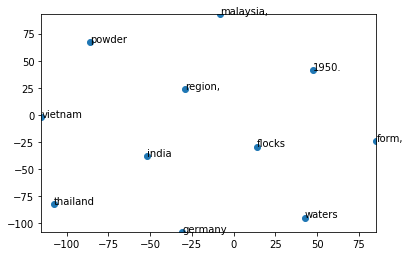

In [104]:
closest_words(model, 'india', 10)

In [105]:
train_data.Phrase = train_data.Phrase.apply(lambda x : x.lower())

In [107]:
train_data.Phrase

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object